# Open CV Example stuff 

In [1]:
from IPython.display import Image
import cv2 as cv
import os
import json
from matplotlib import pyplot as plt

In [2]:
folder: str = '/data/auswertung/001_kaluebbe-west-5shot/'
file_numbers: list[str] = ['022', '024', '026']
file_names: list[str] = [file for file in os.listdir(folder) if file[-9:-6] in file_numbers]
file_names

['DJI_20240306172942_0022_T.JPG',
 'DJI_20240306173003_0026_T.JPG',
 'DJI_20240306172953_0024_T.JPG']

In [3]:
coco_name_cvat: str = f'{folder}instances_default.json'
coco_name_training: str = f'{folder}training_instances.json'


# Load the JSON file
with open(coco_name_cvat, 'r') as file:
    data = json.load(file)

# Filter image ids for which an annotation entry is available
training_image_ids = set([annotation['image_id'] for annotation in data['annotations']])
# training_image_names = [image['file_name'] for image in data['images'] if image['id'] in training_image_ids] # only filenames
data['images'] = [image for image in data['images'] if image['id'] in training_image_ids] # complete entry

In [4]:
image_ids: list[int] = [image['id'] for image in data['images'] if image['file_name'] in file_names]
image_ids

[11, 12, 13]

In [5]:
annotations: list[dict] = [annotation for annotation in data['annotations'] if annotation['image_id'] in image_ids]

## Display single components of image

Text(0.5, 1.0, 'Merged Output')

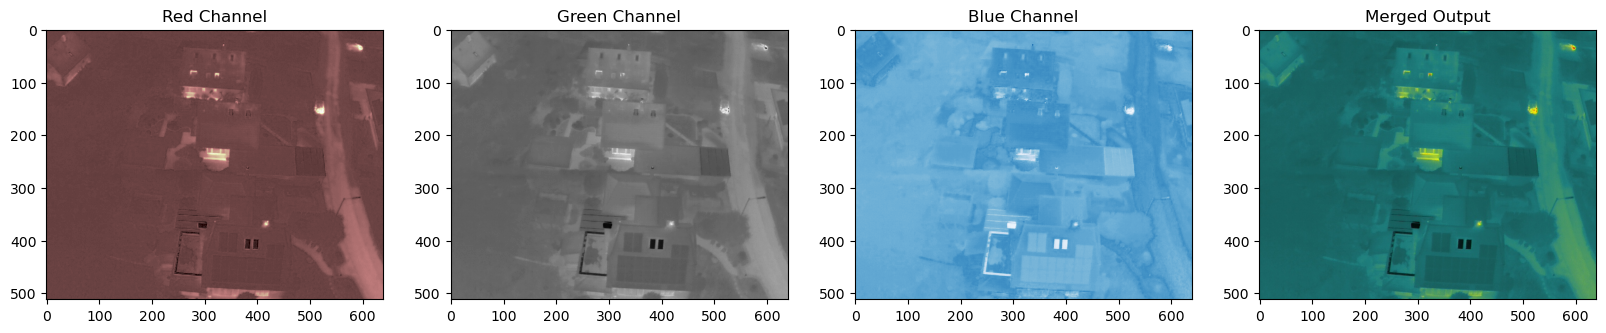

In [6]:
# Split the image into the B,G,R components
image: str = f'{folder}{file_names[2]}'
img_NZ_bgr = cv.imread(image, cv.IMREAD_COLOR)
b, g, r = cv.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="pink");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="Blues");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

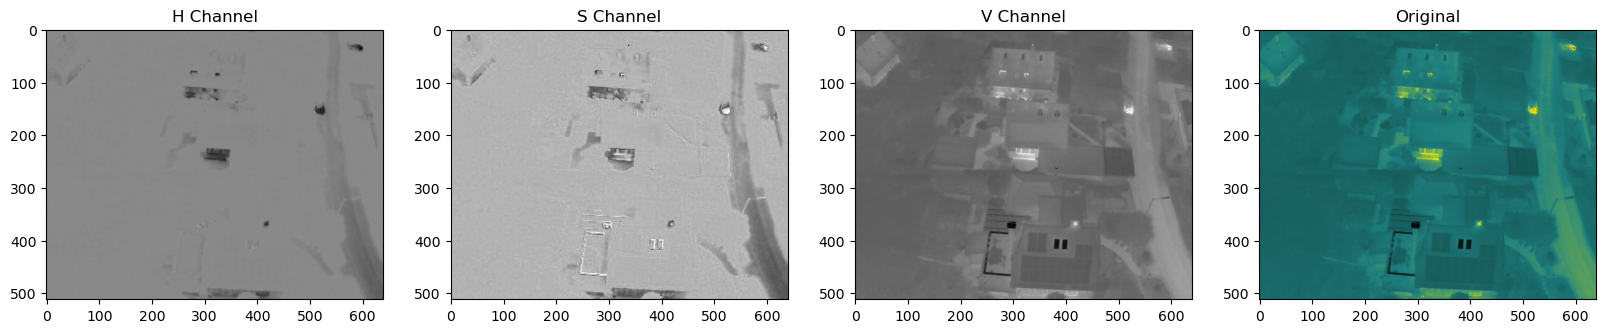

In [7]:
img_hsv = cv.cvtColor(img_NZ_bgr, cv.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_bgr[:, :, ::-1]);   plt.title("Original");

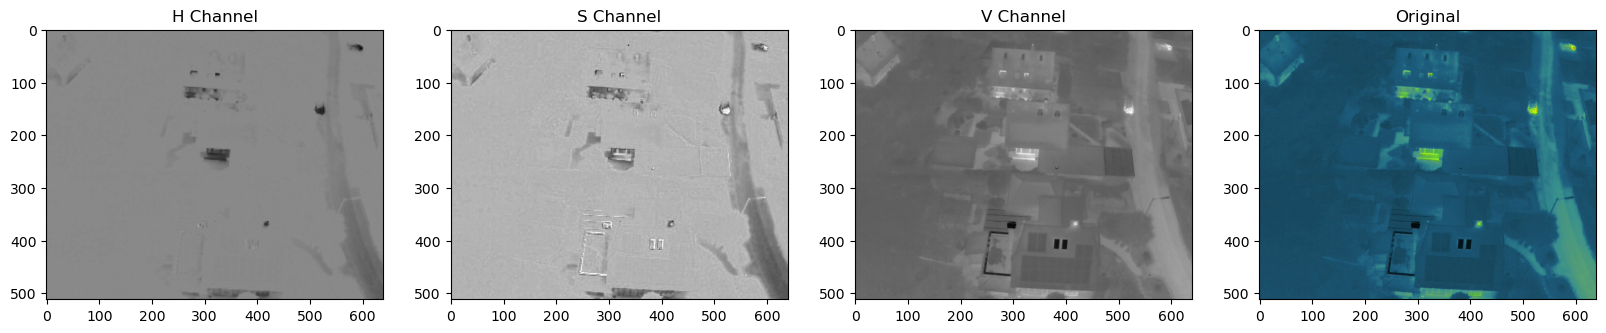

In [8]:
h_new = h + 10
img_NZ_merged = cv.merge((h_new, s, v))
img_NZ_rgb = cv.cvtColor(img_NZ_merged, cv.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image. 

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).

2. `thresh`: threshold value.

3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

4. `type`: thresholding type (see ThresholdTypes).


### <font color="green">Function Syntax </font>

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied

3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html" target="_blank">Documentation link</a>

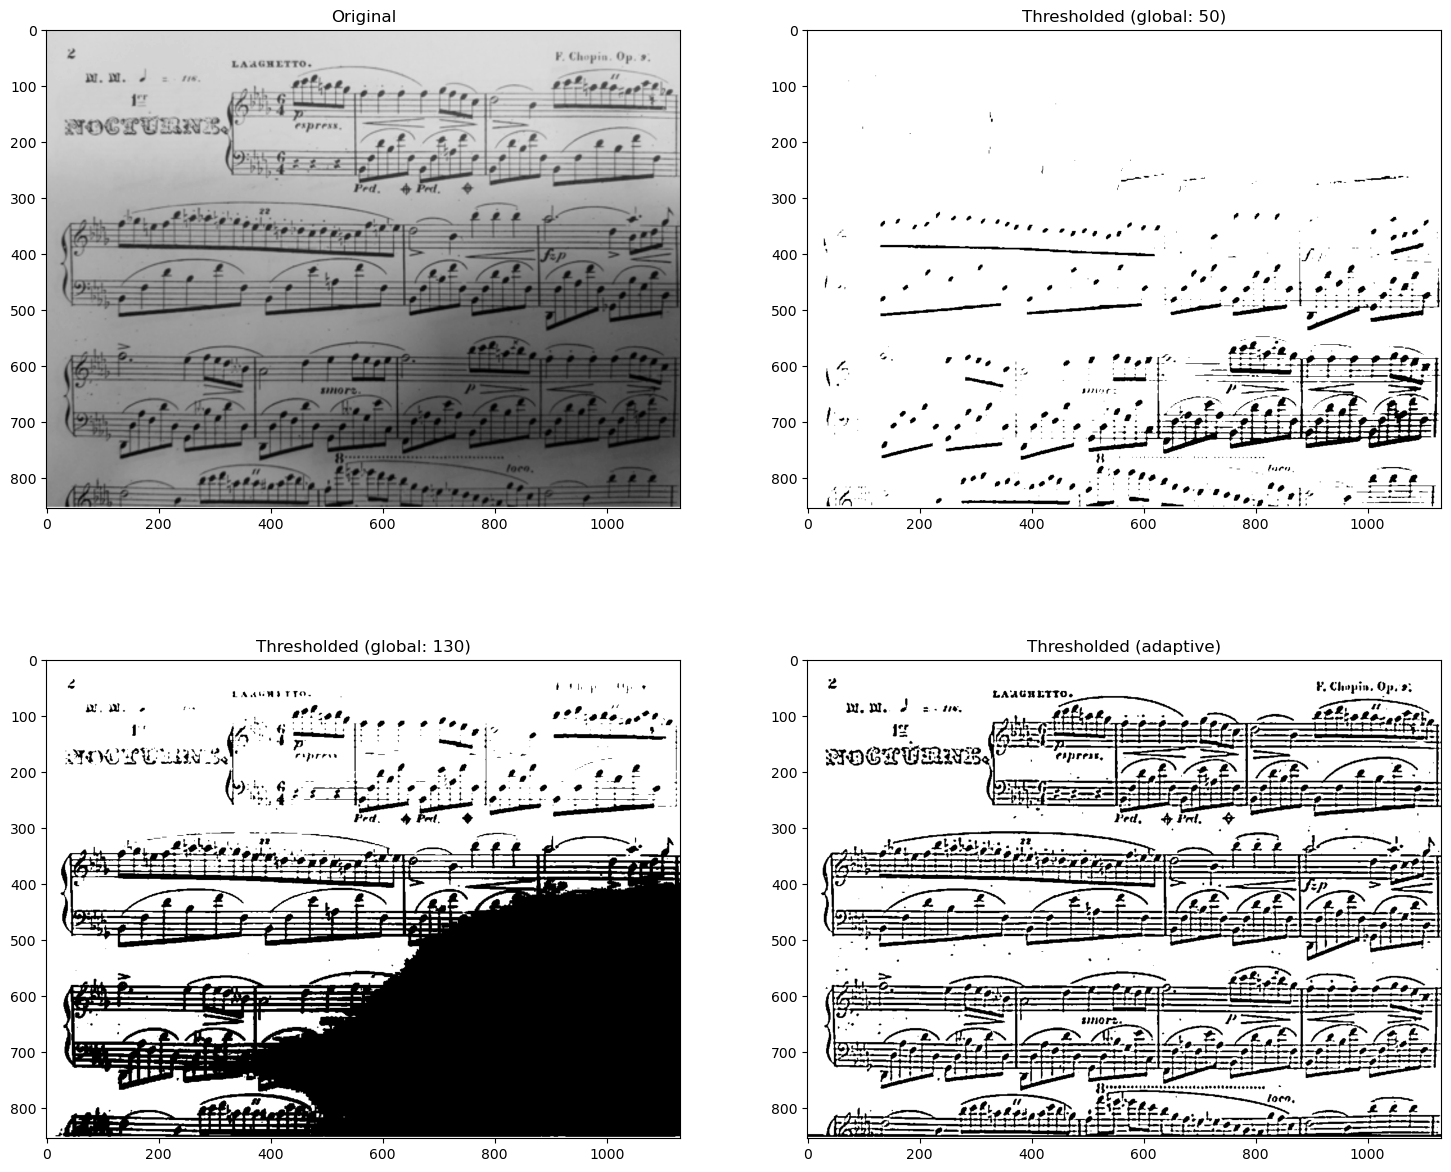

In [9]:
# Read the original image
img_read = cv.imread("Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 7)
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv.bitwise_and()`. Others include: `cv.bitwise_or()`, `cv.bitwise_xor()`, `cv.bitwise_not()`

``` python
dst = cv.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.

2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. <a href="https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html" target="_blank">Arithmetic Operations on Images</a>

2. <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14" target="_blank">bitwise_and(...) function</a>

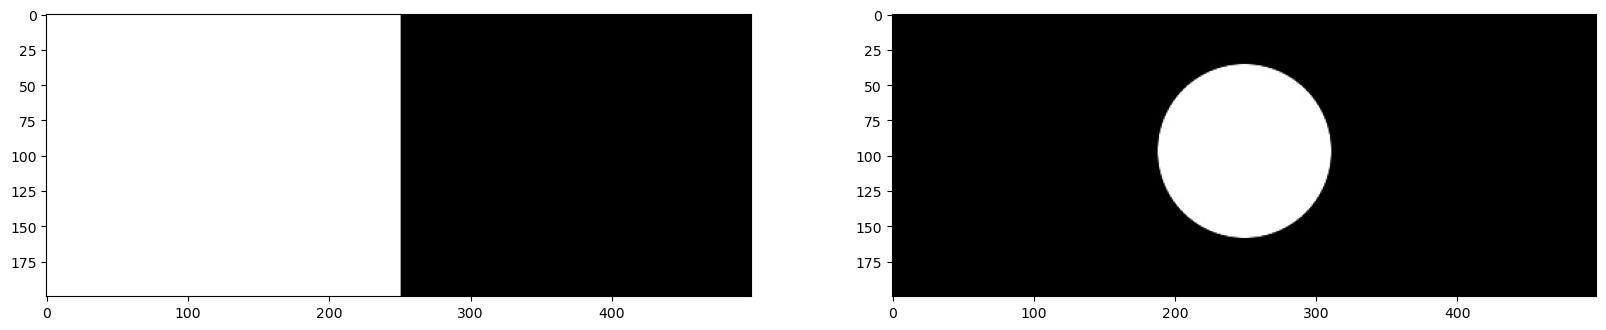

In [10]:
img_rec = cv.imread("rectangle.jpg", cv.IMREAD_GRAYSCALE)

img_cir = cv.imread("circle.jpg", cv.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")

### <font color="green">Bitwise AND Operator </font>

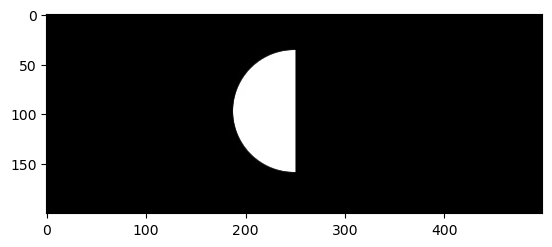

In [11]:
result = cv.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### <font color="green">Bitwise OR Operator </font>

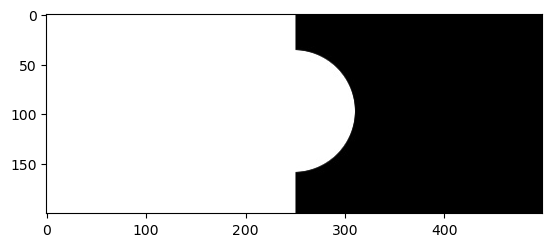

In [12]:
result = cv.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray");

### <font color="green">Bitwise XOR Operator </font>

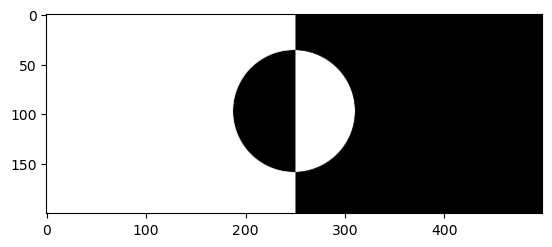

In [13]:
result = cv.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray");

### <font color="green">Read Foreground image</font>

(700, 700, 3)


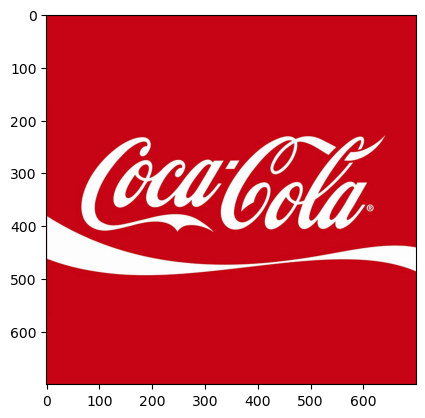

In [14]:
img_bgr = cv.imread("coca-cola-logo.png")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

### <font color="green">Read Background image</font>

(700, 700, 3)


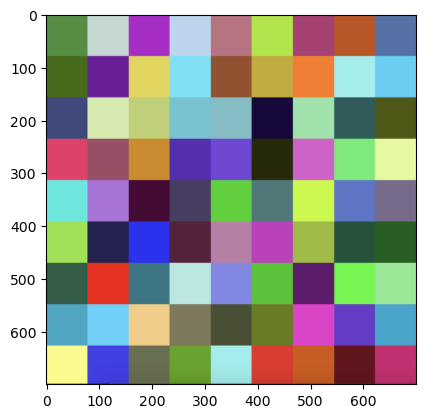

In [15]:
# Read in image of color cheackerboad background
img_background_bgr = cv.imread("checkerboard_color.png")
img_background_rgb = cv.cvtColor(img_background_bgr, cv.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv.resize(img_background_rgb, dim, interpolation=cv.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### <font color="green">Create Mask for original Image</font>

(700, 700)


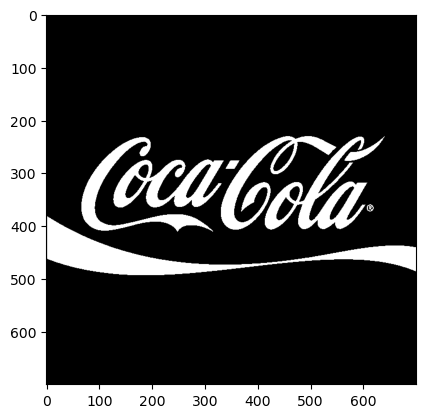

In [16]:
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

In [17]:
img_mask[400:500,:10]

array([[  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255

### <font color="green">Invert the Mask</font>

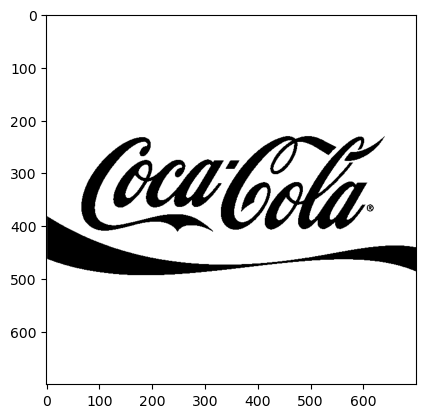

In [18]:
# Create an inverse mask
img_mask_inv = cv.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

### <font color="green">Apply background on the Mask</font>

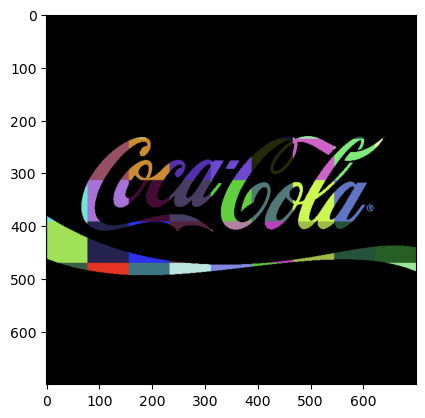

In [19]:
# Create colorful background "behind" the logo lettering
img_background = cv.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background);

### <font color="green">Isolate foreground from image</font>

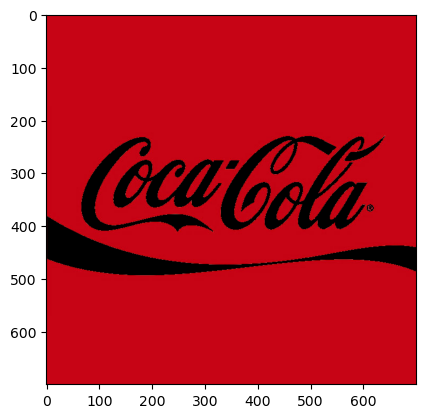

In [20]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### <font color="green">Result: Merge Foreground and Background</font>

True

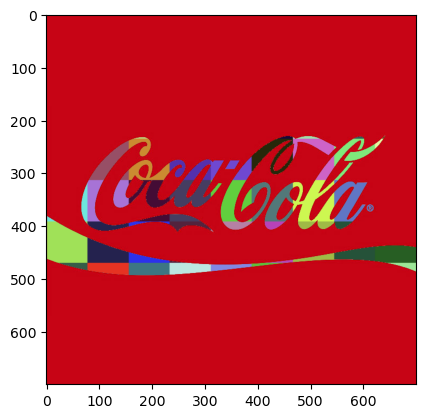

In [21]:
# Add the two previous results obtain the final result
result = cv.add(img_background, img_foreground)
plt.imshow(result)
cv.imwrite("logo_final.png", result[:, :, ::-1])

## For me:

1. Create Mask from Annotations
2. **Follow Digital Screeni Tutorial to create mask from cocojson**
3. Use Operators to extract pixelvalues from Iamge
4. Print Semit transparent mask on top of image
    1. Here An aproach coult be the add function (to add a yellow, blue, or whatever color value on selected pixels)
    2. If not working turn pixels in area to grayscale and add this to color
    3. google opencv transparent overla
5. 

In [22]:
cv.bitwise_and

<function bitwise_and>

## <font color="blue">From Chat GPT:</font>

For printing transparent colored mask

Explanation:

1. `Load the Image and Mask:` The script loads the image and the mask using OpenCV.
2. `Convert Color Space:` Since OpenCV loads images in BGR format by default, we convert the image to RGB.
3. `Create Colored Mask:` A colored mask is created by setting the mask values to the red channel.
4. `Overlay the Mask:` The mask is overlaid on the image using the addWeighted function, which allows for transparency control.
5. `Display the Image:` The final image is displayed using matplotlib.

Replace `path_to_your_image.jpg` and `path_to_your_mask.png` with the paths to your actual image and mask files. The mask should be a binary or grayscale image where the regions of interest are non-zero.

If you have any specific details or variations you'd like to apply, let me know!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image and the mask
image_path = 'path_to_your_image.jpg'
mask_path = 'path_to_your_mask.png'

image = cv.imread(image_path)
mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)

# Convert image from BGR to RGB (OpenCV loads images in BGR format)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Create a colored version of the mask
colored_mask = np.zeros_like(image)
colored_mask[:, :, 0] = mask  # Red channel

# Combine the image and the colored mask with transparency
alpha = 0.5  # Transparency factor

# Overlay the mask on the image
overlay = cv.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()